<a href="https://colab.research.google.com/github/Nikerlas/ImageProcess/blob/main/Jobsheet1_ImageProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##P1. Mendefinisikan istilah bit, byte, kilobyte, megabyte dll pada citra

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [18]:
coins = data.coins()
camera = data.camera()
astronaut = data.astronaut()

In [19]:
def hitung_ukuran(image):
  bit_per_pixel =8 if len(image.shape) == 2 else 24
  totalPixel = image.shape[0] * image.shape[1]
  totalBits = totalPixel * bit_per_pixel
  totalBytes = totalBits / 8
  total_kb = totalBytes / 1024
  total_mb = total_kb / 1024
  return totalBits, totalBytes, total_kb, total_mb

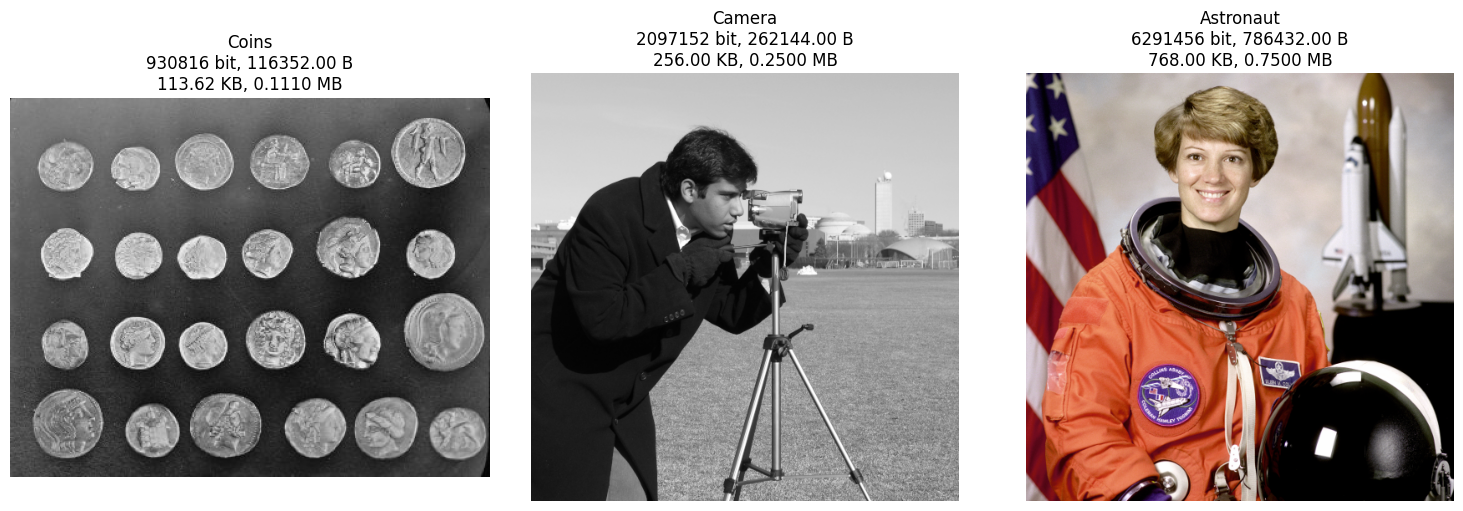

In [20]:
rig, axes = plt.subplots(1, 3, figsize=(15, 5))
gambarList = [coins, camera, astronaut]
namaList = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambarList, namaList):
  bits, bytes_, kb, mb = hitung_ukuran(img)
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
  ax.axis('off')

plt.tight_layout()
plt.show()


##P2. Citra digital tersusun dari beberapa pixel

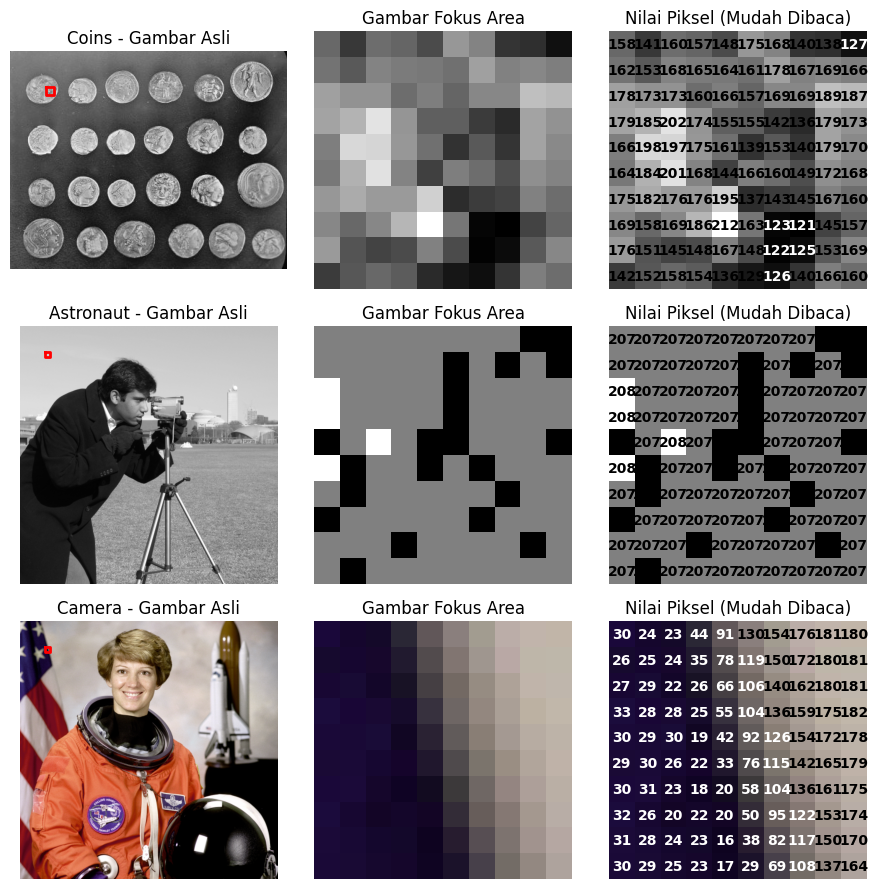

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))

x_start, x_end = 50, 60
y_start, y_end = 50, 60

gambarList = [coins, camera, astronaut]
namaList = {"Coins", "Camera", "Astronaut"}

for i, (img, nama) in enumerate(zip(gambarList, namaList)):
  axes[i, 0].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  axes[i, 0].set_title(f"{nama} - Gambar Asli")
  axes[i, 0].axis('off')

  rect_X = [x_start, x_end, x_end, x_start, x_start]
  rect_y = [y_start, y_start, y_end, y_end, y_start]
  axes[i, 0].plot(rect_X, rect_y, color="red", linewidth=2)

  zoomedImg = img[y_start:y_end, x_start:x_end]
  axes[i, 1].imshow(zoomedImg, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
  axes[i, 1].set_title("Gambar Fokus Area")
  axes[i, 1].axis('off')

  axes[i, 2].imshow(zoomedImg, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
  for y in range(zoomedImg.shape[0]):
    for x in range(zoomedImg.shape[1]):
      if len(img.shape) == 3:
        pixelValue = np.mean(zoomedImg[y, x]).astype(int)
      else:
        pixelValue = zoomedImg[y, x]

      textColor = "white" if pixelValue < 128 else "black"
      axes[i, 2].text(x, y, str(pixelValue), color=textColor, ha='center', va='center', fontsize=10, fontweight='bold')
  axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
  axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

##P3. Citra disimpan dalam Array

In [22]:
import numpy as np

In [23]:
def infoArrayNumpy(image, nama):
  print(f"\n=== {nama} ===")
  print(f"Tipe Data: {type(image)}")
  print(f"Dimensi: {image.shape}")
  print(f"Tipe Nilai Piksel: {image.dtype}")
  print("Contoh nilai piksel (5x5 pertama): ")
  print(image[:5, :5] if len(image.shape) == 2 else image[:5, :5, :])

infoArrayNumpy(coins, "Coins")
infoArrayNumpy(camera, "Camera")
infoArrayNumpy(astronaut, "Astronaut")


=== Coins ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (303, 384)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama): 
[[ 47 123 133 129 137]
 [ 93 144 145 143 145]
 [126 147 143 147 145]
 [131 136 133 139 136]
 [131 133 134 135 129]]

=== Camera ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama): 
[[200 200 200 200 199]
 [200 199 199 200 199]
 [199 199 199 200 200]
 [200 200 199 199 199]
 [200 200 200 200 199]]

=== Astronaut ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512, 3)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama): 
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  [ 54  51  98]
  [ 76  76 106]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  [106 107 120]
  [128 128 131]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  [159 157 157]
  [167 165 161]]

 [[220 213 210]
  [214 206 206]
  [202 198 196]
  [197 191 193]
  [200 194 196]]

 [[232 223 223]
  [226 220 215]
  [221 

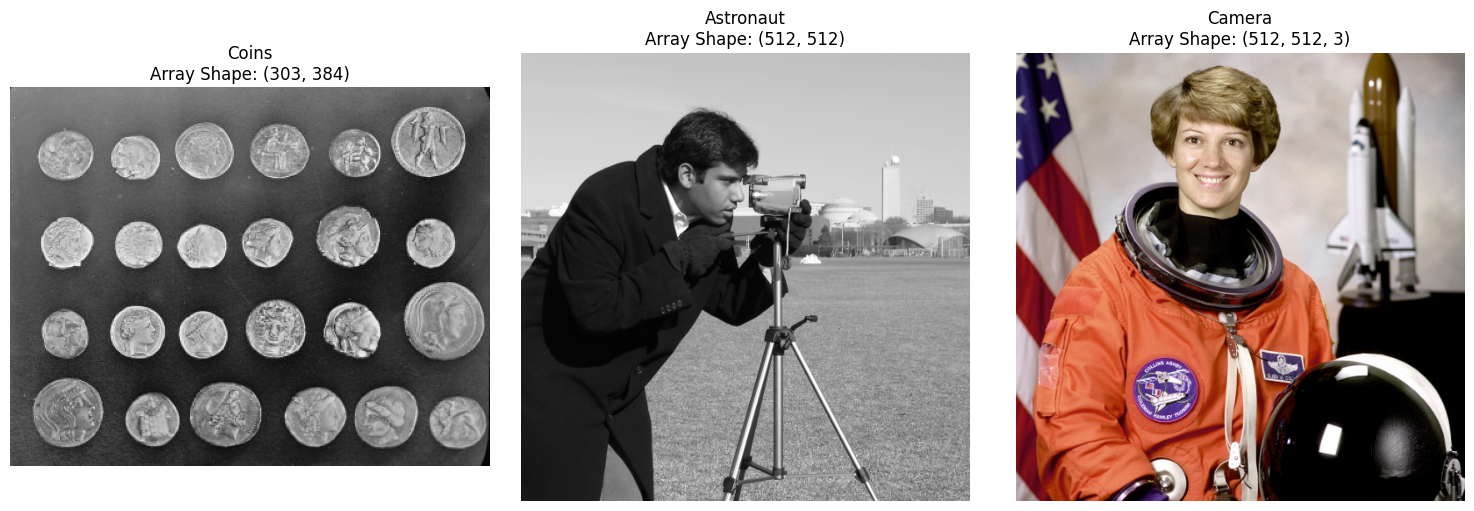

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, img, nama in zip(axes, gambarList, namaList):
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\nArray Shape: {img.shape}")
  ax.axis('off')

plt.tight_layout()
plt.show()

##P4. Sistem Koordinat Kiri Atas dalam Citra Digital

<function matplotlib.pyplot.show(close=None, block=None)>

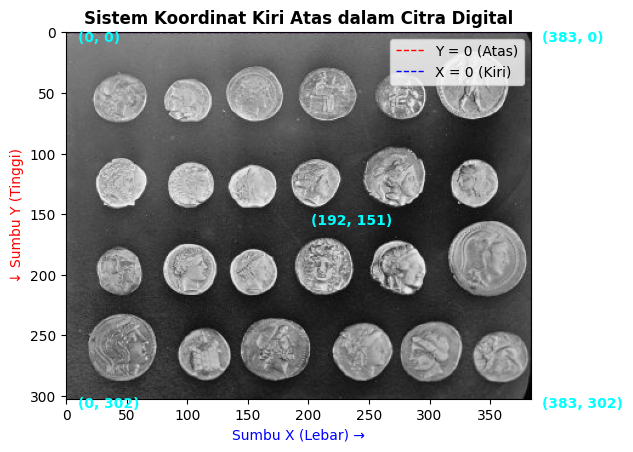

In [25]:
gambarSample = coins
height, width = gambarSample.shape
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(gambarSample, cmap='gray')
ax.set_title("Sistem Koordinat Kiri Atas dalam Citra Digital", fontsize=12, fontweight="bold")
ax.set_xlabel("Sumbu X (Lebar) →", fontsize=10, color="blue")
ax.set_ylabel("↓ Sumbu Y (Tinggi)", fontsize=10, color="red")

ax.axhline(y=0, color='red', linestyle='--', linewidth=1, label="Y = 0 (Atas)")
ax.axhline(y=0, color='blue', linestyle='--', linewidth=1, label="X = 0 (Kiri)")

koordinat_titik = [(0, 0), (width-1, 0), (0, height-1), (width-1, height-1), (width//2, height//2)]
for x, y in koordinat_titik:
  ax.text(x + 10, y + 10, f"({x}, {y})", color="cyan", fontsize=10, fontweight="bold", ha="left", va="bottom")
ax.legend(loc="upper right")

plt.show

##P5. Warna RGB dalam citra digital

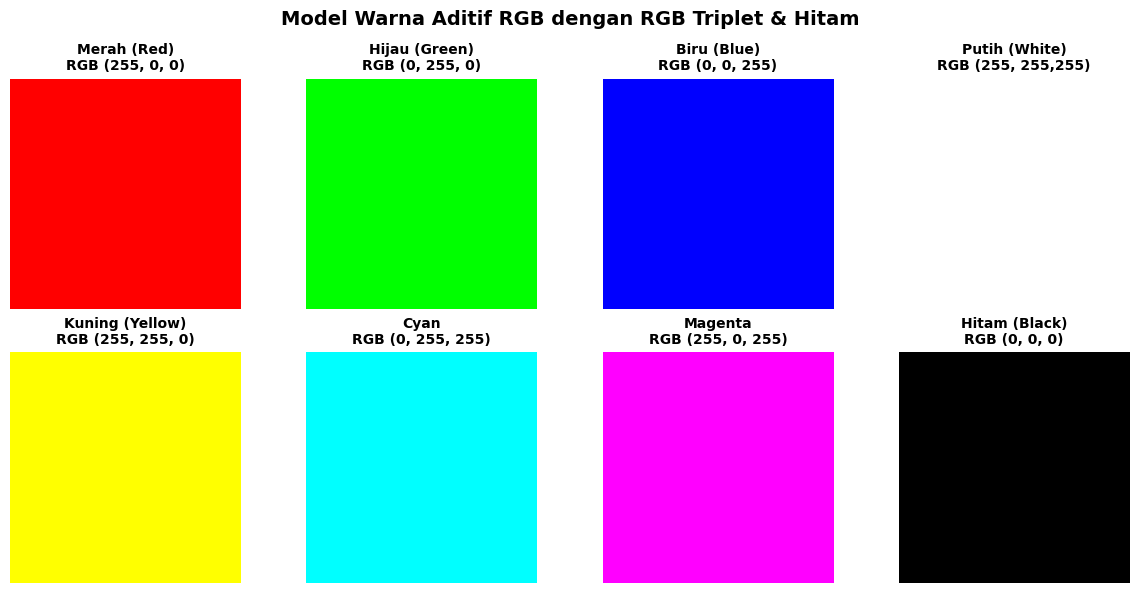

In [26]:
red_channel = np.zeros((100, 100, 3), dtype=np.uint8)
green_channel = np.zeros((100, 100, 3), dtype=np.uint8)
blue_channel = np.zeros((100, 100, 3), dtype=np.uint8)

red_channel[:, :, 0] = 255 # (255, 0, 0) - Merah
green_channel[:, :, 1] = 255 # (0, 255, 0) - Hijau
blue_channel[:, :, 2] = 255 # (0, 0, 255) - Biru

yellow = red_channel + green_channel # (255, 255, 0) - Kuning
cyan = green_channel + blue_channel # (0, 255, 255) - Cyan
magenta = red_channel + blue_channel # (255, 0, 255) - Magenta
white = red_channel + green_channel + blue_channel # (255, 255, 255) -Putih

black = np.zeros((100, 100, 3), dtype=np.uint8) # (0, 0, 0) - Hitam
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
color_list = [red_channel, green_channel, blue_channel, white, yellow,cyan, magenta, black]
color_names = ["Merah (Red)", "Hijau (Green)", "Biru (Blue)", "Putih (White)", "Kuning (Yellow)", "Cyan", "Magenta", "Hitam (Black)"]
rgb_values = ["(255, 0, 0)", "(0, 255, 0)", "(0, 0, 255)", "(255, 255,255)", "(255, 255, 0)", "(0, 255, 255)", "(255, 0, 255)", "(0, 0, 0)"]

for ax, color, name, rgb in zip(axes.flat, color_list, color_names,rgb_values):
    ax.imshow(color)
    ax.set_title(f"{name}\nRGB {rgb}", fontsize=10, fontweight="bold")
    ax.axis('off')

plt.suptitle("Model Warna Aditif RGB dengan RGB Triplet & Hitam",fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

##P6. Urutan tiga nilai warna dalam citra scikit-image

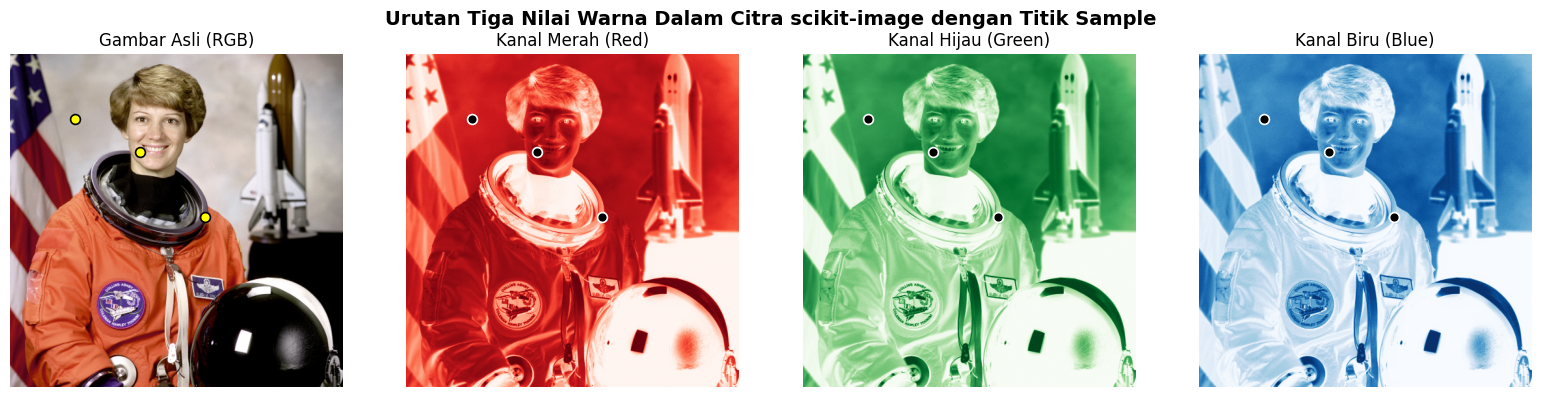

Nilai RGB pada titik koordinat yang dipilih:
Titik 1 - Koordinat (100, 100): 
  Red (Merah)   : 187
  Green (Hijau) : 176
  Blue (Biru)   : 169
  RGB Triplet   : (187, 176, 169)
Titik 2 - Koordinat (200, 150): 
  Red (Merah)   : 236
  Green (Hijau) : 210
  Blue (Biru)   : 184
  RGB Triplet   : (236, 210, 184)
Titik 3 - Koordinat (300, 250): 
  Red (Merah)   : 96
  Green (Hijau) : 76
  Blue (Biru)   : 93
  RGB Triplet   : (96, 76, 93)


In [27]:
gambar_rgb = data.astronaut()

red_channel = astronaut[:, :, 0]
green_channel = astronaut[:, :, 1]
blue_channel = astronaut[:, :, 2]

titik_koordinat = [(100, 100), (200, 150), (300, 250)]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(astronaut)
axes[0].set_title("Gambar Asli (RGB)")
for x, y in titik_koordinat:
  axes[0].scatter(x, y, color='yellow', s=50, edgecolors='black', linewidth=1.2)

axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title("Kanal Merah (Red)")

for x, y in titik_koordinat:
  axes[1].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title("Kanal Hijau (Green)")

for x, y in titik_koordinat:
  axes[2].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title("Kanal Biru (Blue)")

for x, y in titik_koordinat:
  axes[3].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

for ax in axes:
  ax.axis('off')

plt.suptitle("Urutan Tiga Nilai Warna Dalam Citra scikit-image dengan Titik Sample", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Nilai RGB pada titik koordinat yang dipilih:")
for i, (x, y) in enumerate(titik_koordinat):
  r_val, g_val, b_val, = astronaut[y, x, 0], astronaut[y, x, 1], astronaut[y, x, 2]
  print(f"Titik {i+1} - Koordinat ({x}, {y}): ")
  print(f"  Red (Merah)   : {r_val}")
  print(f"  Green (Hijau) : {g_val}")
  print(f"  Blue (Biru)   : {b_val}")
  print(f"  RGB Triplet   : ({r_val}, {g_val}, {b_val})")

##P7. Karakteristik format citra BMP, JPEG, dan TIFF

<ipython-input-28-edb40034352d>:6: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave("astronaut.jpg", gambar, quality=95)


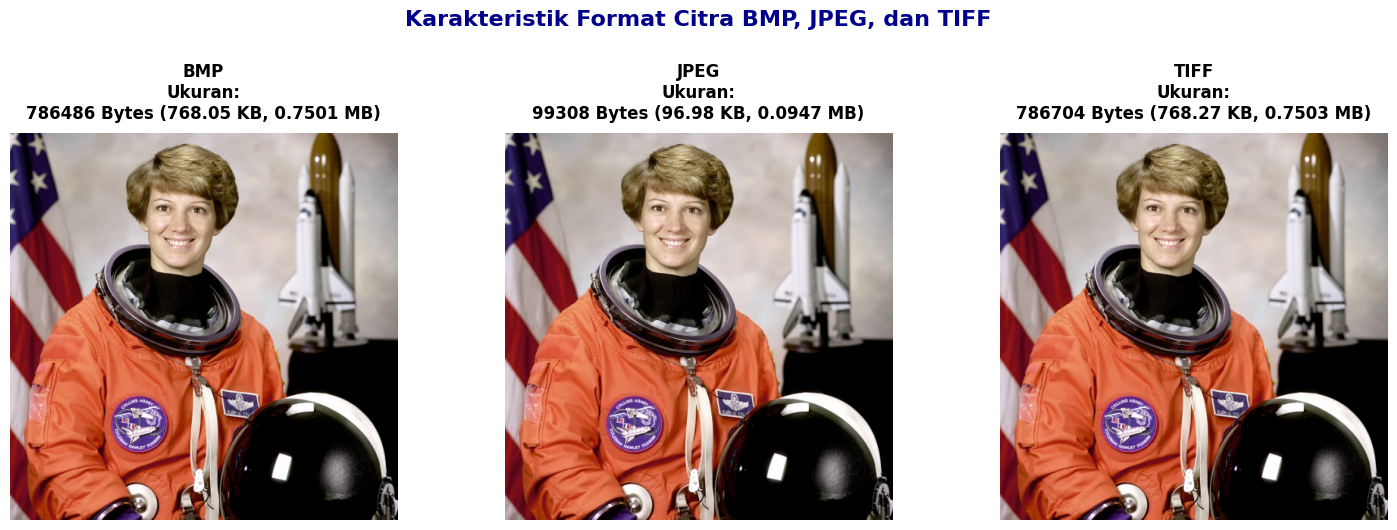

Karakteristik Format Citra:

1. BMP (Bitmap):
- Format tidak terkompresi, menghasilkan ukuran file yang besar.
- Kualitas gambar sangat baik, tidak ada kehilangan data.
- Cocok untuk pengolahan citra yang memerlukan ketelitian tinggi.
- Ukuran file: 786486 Bytes (768.05 KB, 0.7501 MB)

2. JPEG (Joint Photographic Experts Group):
- Format terkompresi dengan metode lossy (menghilangkan sebagian data).
- Ukuran file lebih kecil dibanding BMP dan TIFF.
- Cocok untuk fotografi, media sosial, dan tampilan web.
- Ukuran file: 99308 Bytes (96.98 KB, 0.0947 MB)

3. TIFF (Tagged Image File Format):
- Format fleksibel yang mendukung kompresi lossy atau lossless.
- Digunakan dalam pencetakan profesional dan pemrosesan citra medis.
- Ukuran file bisa besar tergantung tingkat kompresi yang digunakan.
- Ukuran file: 786704 Bytes (768.27 KB, 0.7503 MB)


In [28]:
from skimage import io

gambar = data.astronaut()

io.imsave("astronaut.bmp", gambar)
io.imsave("astronaut.jpg", gambar, quality=95)
io.imsave("astronaut.tiff", gambar)

import os

def ukuran_file(nama_file):
  size_bytes = os.path.getsize(nama_file)
  size_kb = size_bytes / 1024
  size_mb = size_kb / 1024
  return f"{size_bytes} Bytes ({size_kb:.2f} KB, {size_mb:.4f} MB)"

format_citra = ["BMP", "JPEG", "TIFF"]
nama_file = ["astronaut.bmp", "astronaut.jpg", "astronaut.tiff"]
ukuran = [ukuran_file(file) for file in nama_file]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, fmt, file in zip(axes, format_citra, nama_file):
  img = io.imread(file)
  ax.imshow(img)
  ax.set_title(f"{fmt}\nUkuran:\n{ukuran_file(file)}", fontsize=12, fontweight="bold", color="black", pad=10)
  ax.axis("off")

plt.suptitle("Karakteristik Format Citra BMP, JPEG, dan TIFF",fontsize=16, fontweight="bold", color="darkblue", y=1.05)
plt.tight_layout()
plt.show()

print("Karakteristik Format Citra:")
print("\n1. BMP (Bitmap):")
print("- Format tidak terkompresi, menghasilkan ukuran file yang besar.")
print("- Kualitas gambar sangat baik, tidak ada kehilangan data.")
print("- Cocok untuk pengolahan citra yang memerlukan ketelitian tinggi.")
print(f"- Ukuran file: {ukuran[0]}")
print("\n2. JPEG (Joint Photographic Experts Group):")
print("- Format terkompresi dengan metode lossy (menghilangkan sebagian data).")
print("- Ukuran file lebih kecil dibanding BMP dan TIFF.")
print("- Cocok untuk fotografi, media sosial, dan tampilan web.")
print(f"- Ukuran file: {ukuran[1]}")
print("\n3. TIFF (Tagged Image File Format):")
print("- Format fleksibel yang mendukung kompresi lossy atau lossless.")
print("- Digunakan dalam pencetakan profesional dan pemrosesan citra medis.")
print("- Ukuran file bisa besar tergantung tingkat kompresi yang digunakan.")
print(f"- Ukuran file: {ukuran[2]}")

##P8. Kompresi lossy dan lossless

<ipython-input-29-0205ee7a3ed8>:5: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave(jpeg_quality_50, gambar, quality=50)
<ipython-input-29-0205ee7a3ed8>:6: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave(jpeg_quality_90, gambar, quality=90)


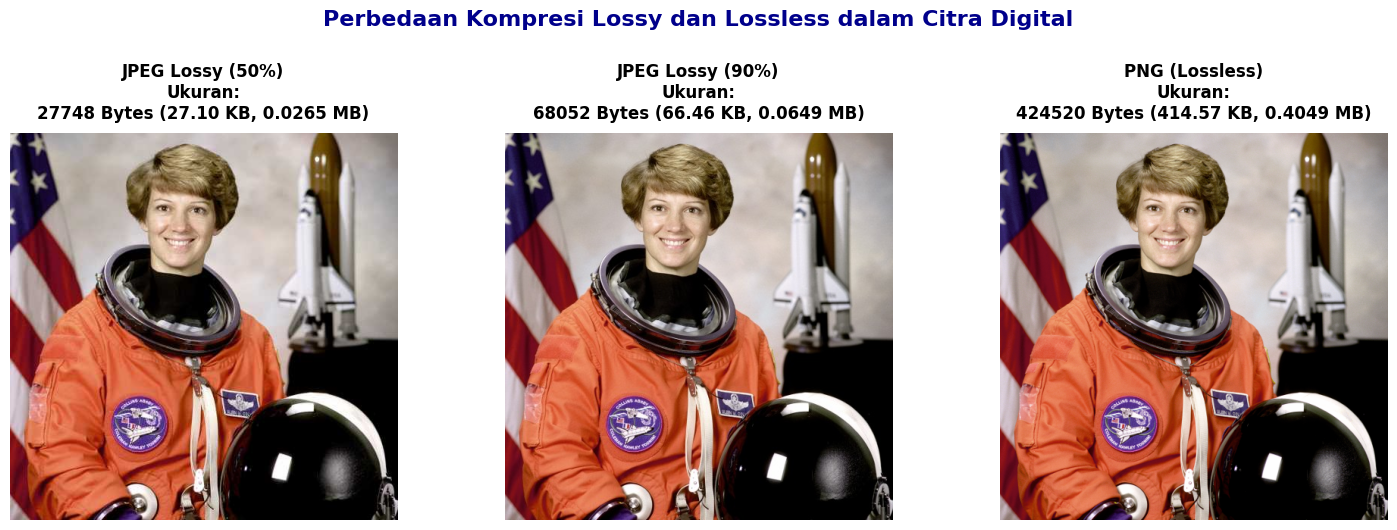

Perbedaan Kompresi Lossy dan Lossless dalam Citra Digital:

1. JPEG(Lossy, Quality=50):
- Menggunakan kompresi lossy dengan kualitas rendah(Q=50).
- Detail gambar berkurang, muncul artefak kompresi.
- Ukuran file lebih besar.
- Ukuran file: 27748 Bytes (27.10 KB, 0.0265 MB)

2. JPEG (Lossy, Quality=90):
- Menggunakan kompresi lossy dengan kualitas lebih tinggi (Q=90).
- Detail gambar masih cukup baik, artefak lebih sedikit.
- Ukuran file lebih besar dibanding Q=50, tetapi lebih kecil dibanding lossless.
- Ukuran file: 68052 Bytes (66.46 KB, 0.0649 MB)

3. PNG (Lossless):
- Menggunakan kompresi lossless, tidak ada kehilangan data.
- Detail gambar tetap sempurna seperti aslinya.
- Ukuran file lebih besar dibanding JPEG lossy.
- Ukuran file: 424520 Bytes (414.57 KB, 0.4049 MB)


In [29]:
jpeg_quality_50 = "astronaut_lossy_50.jpg"
jpeg_quality_90 = "astronaut_lossy_90.jpg"
png_lossless = "astronaut_lossless.png"

io.imsave(jpeg_quality_50, gambar, quality=50)
io.imsave(jpeg_quality_90, gambar, quality=90)
io.imsave(png_lossless, gambar)

nama_file_kompresi = [jpeg_quality_50, jpeg_quality_90, png_lossless]
ukuran_kompresi = [ukuran_file(file) for file in nama_file_kompresi]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

kompresi_label = ["JPEG Lossy (50%)", "JPEG Lossy (90%)", "PNG (Lossless)"]

for ax, file, label in zip(axes, nama_file_kompresi, kompresi_label):
  img = io.imread(file)
  ax.imshow(img)
  ax.set_title(f"{label}\nUkuran:\n{ukuran_file(file)}", fontsize=12, fontweight="bold", color="black", pad=10)
  ax.axis("off")

plt.suptitle("Perbedaan Kompresi Lossy dan Lossless dalam Citra Digital", fontsize=16, fontweight="bold", color="darkblue", y=1.05)
plt.tight_layout()
plt.show()

print("Perbedaan Kompresi Lossy dan Lossless dalam Citra Digital:")

print("\n1. JPEG(Lossy, Quality=50):")
print("- Menggunakan kompresi lossy dengan kualitas rendah(Q=50).")
print("- Detail gambar berkurang, muncul artefak kompresi.")
print("- Ukuran file lebih besar.")
print(f"- Ukuran file: {ukuran_kompresi[0]}")

print("\n2. JPEG (Lossy, Quality=90):")
print("- Menggunakan kompresi lossy dengan kualitas lebih tinggi (Q=90).")
print("- Detail gambar masih cukup baik, artefak lebih sedikit.")
print("- Ukuran file lebih besar dibanding Q=50, tetapi lebih kecil dibanding lossless.")
print(f"- Ukuran file: {ukuran_kompresi[1]}")

print("\n3. PNG (Lossless):")
print("- Menggunakan kompresi lossless, tidak ada kehilangan data.")
print("- Detail gambar tetap sempurna seperti aslinya.")
print("- Ukuran file lebih besar dibanding JPEG lossy.")
print(f"- Ukuran file: {ukuran_kompresi[2]}")